In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
import pandas as pd
from datascience import *
import numpy as np
import math

In [2]:
#ONLY 2014 DATA AND EMISSIONS IN TONS
emissions = pd.read_csv(r"C:\Users\19177\Documents\UChicago\CS 181\Final Project\emissions2.csv")

In [3]:
#ONLY 2014 DATA AND EMISSIONS IN TONS
emissions

,ID,POLLUTANT,STATE,FIPS,STATE_COUNTY,MAJOR_SOURCE_TYPE,EMISSION_TONS,SECTOR_ONE,SECTOR_TWO,EPA_REGION,COUNTY_SURFACE_AREA,POPULATION_2010
0,1941603,Acrolein,Alabama,1001,AL - Autauga,Fire Sources,0.16,Fires,Agricultural Field Burning,4.0,594,54571.0
1,1941604,Acrolein,Alabama,1001,AL - Autauga,Fire Sources,21.57,Fires,Prescribed Fires,4.0,594,54571.0
2,1941605,Acrolein,Alabama,1001,AL - Autauga,Fire Sources,2.45,Fires,Wildfires,4.0,594,54571.0
3,1941606,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.03,Mobile,Aircraft,4.0,594,54571.0
4,1941607,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.01,Mobile,Locomotives,4.0,594,54571.0
...,...,...,...,...,...,...,...,...,...,...,...,...
970612,2912215,Volatile Organic Compounds,Wyoming,56045,WY - Weston,Stationary Sources,38.74,Solvent,Consumer and Commercial Use,8.0,2398,7208.0
970613,2912216,Volatile Organic Compounds,Wyoming,56045,WY - Weston,Stationary Sources,2.04,Solvent,Degreasing,8.0,2398,7208.0
970614,2912217,Volatile Organic Compounds,Wyoming,56045,WY - Weston,Stationary Sources,0.02,Solvent,Dry Cleaning,8.0,2398,7208.0
970615,2912218,Volatile Organic Compounds,Wyoming,56045,WY - Weston,Stationary Sources,7.96,Solvent,Industrial Surface Coating and Use,8.0,2398,7208.0


In [4]:
#ONLY 2014 DATA AND EMISSIONS IN TONS
emissions = Table.from_df(emissions)

In [5]:
#ONLY 2014 DATA AND EMISSIONS IN TONS
emissions = emissions.where("MAJOR_SOURCE_TYPE", "Mobile Sources")
emissions

ID,POLLUTANT,STATE,FIPS,STATE_COUNTY,MAJOR_SOURCE_TYPE,EMISSION_TONS,SECTOR_ONE,SECTOR_TWO,EPA_REGION,COUNTY_SURFACE_AREA,POPULATION_2010
1941606,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.03,Mobile,Aircraft,4,594,54571
1941607,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.01,Mobile,Locomotives,4,594,54571
1941608,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.2,Mobile,Non-Road - Diesel,4,594,54571
1941609,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.03,Mobile,Non-Road - Gasoline,4,594,54571
1941610,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.00663172,Mobile,Non-Road - Other,4,594,54571
1941611,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.31,Mobile,On-Road - Diesel Heavy Duty Vehicles,4,594,54571
1941612,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.08,Mobile,On-Road - Diesel Light Duty Vehicles,4,594,54571
1941613,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.004395,Mobile,On-Road - non-Diesel Heavy Duty Vehicles,4,594,54571
1941614,Acrolein,Alabama,1001,AL - Autauga,Mobile Sources,0.29,Mobile,On-Road - non-Diesel Light Duty Vehicles,4,594,54571
1941625,Acrolein,Alabama,1003,AL - Baldwin,Mobile Sources,2.37,Mobile,Aircraft,4,1590,182265


In [6]:
#ONLY 2014 DATA AND EMISSIONS IN TONS
mobile_emissions = emissions.pivot("POLLUTANT", "STATE", values = "EMISSION_TONS", collect = sum)
mobile_emissions

C:\Users\19177\Anaconda2\envs\snakes\lib\site-packages\datascience\tables.py:630: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


STATE,Acrolein,Ammonia,Benzene,Black Carbon,Carbon Monoxide,Chromium VI Compounds,Formaldehyde,Lead,Nitrogen Oxides,PM10,PM2.5,Sulfur Dioxide,Volatile Organic Compounds
Alabama,154.016,2464.62,2476.16,3412.39,951865,0.00810546,1812.05,5.25911,176164,10307.1,6890.27,1525.32,96409.1
Alaska,57.8343,197.563,541.207,1207.17,142748,0.0344094,513.967,3.33707,62554.1,2883.94,2478.02,2934.83,26032.9
Arizona,157.015,2186.71,1956.88,3602.71,846288,0.000262785,1865.82,8.25232,168148,9601.41,6807.37,1190.43,84813.6
Arkansas,91.0566,1269.4,1303.67,2717.64,484474,0,1190.13,4.67405,116081,6611.87,4891.37,495.471,54847.7
California,275.136,13793.6,5525.62,7723.47,1.69653e+06,0.0423466,6684.33,25.4918,446617,33717.1,21071.8,4895.65,237715
Colorado,120.592,1889.84,1964.22,2863.19,739086,0,1524.97,4.86209,126933,8369.33,5833.69,936.452,74011.8
Connecticut,41.5562,1028.19,818.236,913.7,351949,0.00111706,578.05,1.25398,44124,3462.45,2189.37,525.578,32469.4
Delaware,17.1716,327.918,295.961,377.99,119681,0.0168793,210.97,0.470501,20306.8,1351.21,983.39,1945.1,11821.5
District Of Columbia,6.61357,164.15,93.6669,170.09,45298,0,94.51,0.00293178,6441.83,749.123,383.402,55.69,4094.62
Florida,398.816,6701,6893.53,8861.7,2.71932e+06,0.0899661,4899.66,18.556,416562,31318.6,19586.4,12531.9,257547


In [9]:
#ONLY 2014 DATA AND EMISSIONS IN TONS
acrolein = sum(mobile_emissions["Acrolein"])
ammonia = sum(mobile_emissions["Ammonia"])
benzene = sum(mobile_emissions["Benzene"])
black_carbon = sum(mobile_emissions["Black Carbon"])
carbon_monoxide = sum(mobile_emissions["Carbon Monoxide"])
chromium_VI_compounds = sum(mobile_emissions["Chromium VI Compounds"])
formaldehyde = sum(mobile_emissions["Formaldehyde"])
lead = sum(mobile_emissions["Lead"])
nitrogen_oxides = sum(mobile_emissions["Nitrogen Oxides"])
pm10 = sum(mobile_emissions["PM10"])
pm2_5 = sum(mobile_emissions["PM2.5"])
sulfur_dioxide = sum(mobile_emissions["Sulfur Dioxide"])
volatile_organic_compounds = sum(mobile_emissions["Volatile Organic Compounds"])

pollutants_names = np.array(["Acrolein", "Ammonia", "Benzene", "Black Carbon", "Carbon Monoxide", "Chromium VI Compounds", "Formaldehyde", "Lead", "Nitrogen Oxides", "PM10", "PM2.5", "Sulfur Dioxide", "Volatile Organic Compounds"])
total_pollutants_count = np.array([acrolein, ammonia, benzene, black_carbon, carbon_monoxide, chromium_VI_compounds, formaldehyde, lead, nitrogen_oxides, pm10, pm2_5, sulfur_dioxide, volatile_organic_compounds])
total_pollutants = Table().with_columns("Compounds", pollutants_names, r"Count (in Tons)", total_pollutants_count)


In [10]:
#normalize
#ONLY 2014 DATA AND EMISSIONS IN TONS
total_pollutants_count_normalized = total_pollutants_count/sum(total_pollutants_count)
total_pollutants = total_pollutants = Table().with_columns("Compounds", pollutants_names, r"Count (in Tons)", total_pollutants_count_normalized)
total_pollutants_normalized = total_pollutants.sort(r"Count (in Tons)", descending = True)
total_pollutants_normalized = total_pollutants_normalized.relabeled(r"Count (in Tons)", "Proportion")
total_pollutants_normalized

Compounds,Proportion
Carbon Monoxide,0.744596
Nitrogen Oxides,0.149292
Volatile Organic Compounds,0.0785339
PM10,0.00970385
PM2.5,0.00669196
Black Carbon,0.0033071
Ammonia,0.00219986
Benzene,0.00194082
Sulfur Dioxide,0.00191816
Formaldehyde,0.00168612


In [11]:
#ALL YEARS IN KILOTONS
all_years = pd.read_csv(r"C:\Users\19177\Documents\UChicago\CS 181\Final Project\2016_chapter_tables_1 (all years, overall for US)\Chapter Tables\Chapter 2 - Trends\Table 2-2.csv")
all_years = Table.from_df(all_years)
all_years.where("Gas/Source", "Transportation")

Gas/Source,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Unnamed: 26
Transportation,"1,493,758","1,447,602","1,496,852","1,532,412","1,576,980","1,609,862","1,654,302","1,670,141","1,706,636","1,761,057","1,805,460","1,789,429","1,830,641","1,822,261","1,867,141","1,887,033","1,882,633","1,886,149","1,791,798","1,716,966","1,728,267","1,707,631","1,696,752","1,713,008","1,737,598",nan


In [16]:
all_years2 = Table().with_columns("Years", [1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014], "Kilotons of Emissions from Transportation", [1493758,1447602,1496852,1532412,1576980,1609862,1654302,1670141,1706636,1761057,1805460,1789429,1830641,1822261,1867141,1887033,1882633,1886149,1791798,1716966,1728267,1707631,1696752,1713008,1737598])
plt.plot(all_years2.column("Years"), all_years2.column("Kilotons of Emissions from Transportation"))
plt.xlabel("Years")
plt.ylabel("Kilotons of Emissions \nfrom Transportation")
plt.title("Change in Transportation-derived Emissions in the US \nBetween 1990 and 2015 EPA")

Text(0.5, 1.0, 'Change in Transportation-derived Emissions in the US \nBetween 1990 and 2015 EPA')

In [15]:
#CARBON MONOXIDE EMISSIONS OVER TIME IN US
carb_mon_em = pd.read_csv(r"C:\Users\19177\Documents\UChicago\CS 181\Final Project\CO_Emissions_US.csv")
carb_mon_em = Table.from_df(carb_mon_em)

carb_mon_em = carb_mon_em.take([1, 2])
carb_mon_em = carb_mon_em.relabeled("(R) 2015", "2015").relabeled("(R) 2016", "2016").relabeled("(R) 2017", "2017").relabeled("(R) 2018", "2018").relabeled("Unnamed: 0", "Source")
highway_veh = np.array([110.26,104.98,99.71,94.43,89.16,83.88,78.61,75.85,73.24,68.71,68.06,63.48,51.61,48.68,45.7,42.83,40.05,37.27,33.16,27.44,28.24,27.36,26.38,25.41,24.44,23.35,20.14,19.51,17.79,16.87])
off_highway = np.array([21.45,21.93,22.42,22.9,23.39,23.87,24.36,23.67,23.69,23.32,24.18,24.68,22.62,22.38,22.14,21.9,20.37,18.84,17.88,15.92,15.35,14.95,14.39,13.82,13.26,12.69,11.66,11.55,11.58,11.58])
carb_mon_em_new = Table().with_columns("Years", [1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], "Highway Vehicles", highway_veh, "Off Highway", off_highway, "Total", highway_veh+off_highway)

carb_mon_em_new

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#fefcff')
ax.set_facecolor('white')


plt.plot(carb_mon_em_new.column("Years"), carb_mon_em_new.column("Total"), color='#6801A6')
plt.title("US Carbon Monoxide Emissions \nfrom Transportation Vehicles over Time")
plt.xlabel("Years")
plt.ylabel("Amount in Millions of Short Tons")

Text(0, 0.5, 'Amount in Millions of Short Tons')

Gas/Source,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Unnamed: 26
Transportation,"1,493,758","1,447,602","1,496,852","1,532,412","1,576,980","1,609,862","1,654,302","1,670,141","1,706,636","1,761,057","1,805,460","1,789,429","1,830,641","1,822,261","1,867,141","1,887,033","1,882,633","1,886,149","1,791,798","1,716,966","1,728,267","1,707,631","1,696,752","1,713,008","1,737,598",nan
Mobile Combustion,226,220,219,216,212,206,198,191,183,159,149,138,128,119,115,110,106,100,95,92,91,90,86,84,82,nan
Mobile Combustion,138,145,155,161,167,172,175,178,178,168,164,151,141,130,124,115,108,95,87,82,79,75,67,61,55,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [502]:
#DATA FROM ALL STATES, MANY YEARS, CARBON DIOXIDE ONLY
#DO STATES HEATMAP, CHANGE FROM EARLIEST TO LATEST YEAR, 2 PLOTS
all_states_years = pd.read_csv(r"C:\Users\19177\Documents\UChicago\CS 181\Final Project\all_states_years.csv")
all_states_years = Table.from_df(all_states_years)
t1 = all_states_years.where("Unnamed: 3", "CO").where("Unnamed: 2", "HIGHWAY VEHICLES")
t2 = all_states_years.where("Unnamed: 3", "CO").where("Unnamed: 2", "OFF-HIGHWAY")
#NO 1990

# t2 = t2.drop("Unnamed: 4")
# t1 = t1.drop("Unnamed: 4")

highway_veh_CO_all_st = t1.relabeled("Unnamed: 4", "1990").relabeled("Unnamed: 5", "1996").relabeled("Unnamed: 6", "1997").relabeled("Unnamed: 7", "1998").relabeled("Unnamed: 8", "1999").relabeled("Unnamed: 9", "2000").relabeled("Unnamed: 10", "2001").relabeled("Unnamed: 11", "2002").relabeled("Unnamed: 12", "2003").relabeled("Unnamed: 13", "2004").relabeled("Unnamed: 14", "2005").relabeled("Unnamed: 15", "2006").relabeled("Unnamed: 16", "2007").relabeled("Unnamed: 17", "2008").relabeled("Unnamed: 18", "2009").relabeled("Unnamed: 19", "2010").relabeled("Unnamed: 20", "2011").relabeled("Unnamed: 21", "2012").relabeled("Unnamed: 22", "2013").relabeled("Unnamed: 23", "2013").relabeled("Unnamed: 24", "2014").relabeled("Unnamed: 25", "2015").relabeled("Unnamed: 26", "2016").relabeled("Unnamed: 27", "2017").relabeled("Unnamed: 28", "2018").drop("Unnamed: 3").drop("Unnamed: 2").relabeled("Emissions in 1000 / tons", "Statefip").relabeled("Unnamed: 1", "State")

off_highway_veh_CO_all_st = t2.relabeled("Unnamed: 4", "1990").relabeled("Unnamed: 5", "1996").relabeled("Unnamed: 6", "1997").relabeled("Unnamed: 7", "1998").relabeled("Unnamed: 8", "1999").relabeled("Unnamed: 9", "2000").relabeled("Unnamed: 10", "2001").relabeled("Unnamed: 11", "2002").relabeled("Unnamed: 12", "2003").relabeled("Unnamed: 13", "2004").relabeled("Unnamed: 14", "2005").relabeled("Unnamed: 15", "2006").relabeled("Unnamed: 16", "2007").relabeled("Unnamed: 17", "2008").relabeled("Unnamed: 18", "2009").relabeled("Unnamed: 19", "2010").relabeled("Unnamed: 20", "2011").relabeled("Unnamed: 21", "2012").relabeled("Unnamed: 22", "2013").relabeled("Unnamed: 23", "2013").relabeled("Unnamed: 24", "2014").relabeled("Unnamed: 25", "2015").relabeled("Unnamed: 26", "2016").relabeled("Unnamed: 27", "2017").relabeled("Unnamed: 28", "2018").drop("Unnamed: 3").drop("Unnamed: 2").relabeled("Emissions in 1000 / tons", "Statefip").relabeled("Unnamed: 1", "State")
off_highway_veh_CO_all_st
# add up vals

t1990 = highway_veh_CO_all_st.column("1990") + off_highway_veh_CO_all_st.column("1990")
t1996 = highway_veh_CO_all_st.column("1996") + off_highway_veh_CO_all_st.column("1996")
t1997 = highway_veh_CO_all_st.column("1997") + off_highway_veh_CO_all_st.column("1997")
t1998 = highway_veh_CO_all_st.column("1998") + off_highway_veh_CO_all_st.column("1998")
t1999 = highway_veh_CO_all_st.column("1999") + off_highway_veh_CO_all_st.column("1999")
t2000 = highway_veh_CO_all_st.column("2000") + off_highway_veh_CO_all_st.column("2000")
t2001 = highway_veh_CO_all_st.column("2001") + off_highway_veh_CO_all_st.column("2001")
t2002 = highway_veh_CO_all_st.column("2002") + off_highway_veh_CO_all_st.column("2002")
t2003 = highway_veh_CO_all_st.column("2003") + off_highway_veh_CO_all_st.column("2003")
t2004 = highway_veh_CO_all_st.column("2004") + off_highway_veh_CO_all_st.column("2004")
t2005 = highway_veh_CO_all_st.column("2005") + off_highway_veh_CO_all_st.column("2005")
t2006 = highway_veh_CO_all_st.column("2006") + off_highway_veh_CO_all_st.column("2006")
t2007 = highway_veh_CO_all_st.column("2007") + off_highway_veh_CO_all_st.column("2007")
t2008 = highway_veh_CO_all_st.column("2008") + off_highway_veh_CO_all_st.column("2008")
t2009 = highway_veh_CO_all_st.column("2009") + off_highway_veh_CO_all_st.column("2009")
t2010 = highway_veh_CO_all_st.column("2010") + off_highway_veh_CO_all_st.column("2010")
t2011 = highway_veh_CO_all_st.column("2011") + off_highway_veh_CO_all_st.column("2011")
t2012 = highway_veh_CO_all_st.column("2012") + off_highway_veh_CO_all_st.column("2012")
t2013 = highway_veh_CO_all_st.column("2013") + off_highway_veh_CO_all_st.column("2013")
t2014 = highway_veh_CO_all_st.column("2014") + off_highway_veh_CO_all_st.column("2014")
t2015 = highway_veh_CO_all_st.column("2015") + off_highway_veh_CO_all_st.column("2015")
t2016 = highway_veh_CO_all_st.column("2016") + off_highway_veh_CO_all_st.column("2016")
t2017 = highway_veh_CO_all_st.column("2017") + off_highway_veh_CO_all_st.column("2017")
t2018 = highway_veh_CO_all_st.column("2018") + off_highway_veh_CO_all_st.column("2018")
# t2019 = highway_veh_CO_all_st.column("2019") + off_highway_veh_CO_all_st.column("2019")

tfinal = Table().with_columns("Statefip", off_highway_veh_CO_all_st.column("Statefip"), "State", off_highway_veh_CO_all_st.column("State"), "1990", t1990, "1996",t1996, "1997", t1997, "1998", t1998, "1999", t1999,"2000", t2000, "2001", t2001, "2002", t2002, "2003", t2003, "2004", t2004, "2005", t2005, "2006", t2006, "2007", t2007, "2008", t2008, "2009", t2009, "2010", t2010, "2011", t2011, "2012", t2012, "2013", t2013, "2014", t2014, "2015", t2015, "2016", t2016, "2017", t2017, "2018", t2018)
# #total CO emissions from all states, all years
# #BUILD HEATMAPS FOR BOTH OF THESE
for_heat_map_1990 = tfinal.select(["Statefip", "State", "1990", "2018"])
for_heat_map_2018 = tfinal.select(["Statefip", "State", "2018"])
for_heat_map_1990

Statefip,State,1990,2018
01,AL,2661.17,668.663
02,AK,327.679,108.09
04,AZ,2047.74,592.16
05,AR,1357.53,357.553
06,CA,14176,1323.66
08,CO,2130.68,589.039
09,CT,1504.76,251.057
10,DE,400.852,110.292
11,DC,155.221,31.1061
12,FL,6836.09,2247.21


In [ ]:
# 1990: EPA imposes limits on diesel fuel sulfur content to help buses and trucks meet the 1985 emission standards (which become effective in the early 1990s).

# Congress amends the Clean Air Act to require further reductions in HC, CO, NOx, and PM emissions. The amendments also introduce lower tailpipe standards; more stringent emission testing procedures; expanded I/M programs; new vehicle technologies and clean fuels programs; and transportation management provisions. The 1990 amendments also give EPA, for the first time, specific authority to regulate emissions from nonroad engines and vehicles.

# The amendments include fuel provisions that require oxygenated gasoline, which reduces emissions of CO, to be sold in areas that do not meet air quality standards for the pollutant. In addition, the Amendments require reformulated gasoline, which reduces emissions of volatile organic compounds and hazardous air pollutants (or “air toxics”), to be sold in the nine worst areas that do not meet the minimum national air quality standards for ozone.

In [485]:
import plotly 
import us
dt = us.states.mapping('fips', 'abbr')
print(dt)

{'01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY', '60': 'AS', '66': 'GU', '69': 'MP', '72': 'PR', '78': 'VI', '11': 'DC', None: 'PI'}


In [486]:
state_vals = for_heat_map_1990.group('Statefip').to_array()
state_vals

array([('01', 1), ('02', 1), ('04', 1), ('05', 1), ('06', 1), ('08', 1),
       ('09', 1), ('10', 1), ('11', 1), ('12', 1), ('13', 1), ('15', 1),
       ('16', 1), ('17', 1), ('18', 1), ('19', 1), ('20', 1), ('21', 1),
       ('22', 1), ('23', 1), ('24', 1), ('25', 1), ('26', 1), ('27', 1),
       ('28', 1), ('29', 1), ('30', 1), ('31', 1), ('32', 1), ('33', 1),
       ('34', 1), ('35', 1), ('36', 1), ('37', 1), ('38', 1), ('39', 1),
       ('40', 1), ('41', 1), ('42', 1), ('44', 1), ('45', 1), ('46', 1),
       ('47', 1), ('48', 1), ('49', 1), ('50', 1), ('51', 1), ('53', 1),
       ('54', 1), ('55', 1), ('56', 1)],
      dtype=[('Statefip', '<U2'), ('count', '<i4')])

In [489]:
fips = [i[0] for i in state_vals]
print(fips)

['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', '53', '54', '55', '56']


In [490]:
fips = [i[0] for i in state_vals]
solutions = []
for i in fips:
    for key, value in dt.items():
        
        if i == key:
            solutions.append(value)

In [491]:
print(solutions)

['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']


In [555]:
percents = np.array([])
for num in for_heat_map_1990.column("1990"):
    new = 100*((num-min(for_heat_map_1990.column("1990")))/(max(for_heat_map_1990.column("1990"))-min(for_heat_map_1990.column("1990"))))
    percents = np.append(percents, new)
percents2 = np.array([])
for num in for_heat_map_1990.column("2018"):
    new = 100*((num-min(for_heat_map_1990.column("2018")))/(max(for_heat_map_1990.column("2018"))-min(for_heat_map_1990.column("2018"))))
    percents2 = np.append(percents2, new)
    
for_heat_map_1990 = for_heat_map_1990.with_columns("percentsCol", percents, "percentsCol2", percents2)
for_heat_map_1990

Statefip,State,1990,2018,percentsCol,percentsCol2
01,AL,2661.17,668.663,17.873,28.7692
02,AK,327.679,108.09,1.23002,3.47385
04,AZ,2047.74,592.16,13.4979,25.3171
05,AR,1357.53,357.553,8.57517,14.7306
06,CA,14176,1323.66,100,58.3252
08,CO,2130.68,589.039,14.0895,25.1763
09,CT,1504.76,251.057,9.62525,9.92509
10,DE,400.852,110.292,1.7519,3.57318
11,DC,155.221,31.1061,0,0
12,FL,6836.09,2247.21,47.6497,100


In [501]:
fig = px.choropleth(locations=solutions, locationmode="USA-states", 
                    color=for_heat_map_1990.column('percentsCol'), scope="usa", 
                    labels={'color':'Percent Relative to Highest Emissions'}, title  = 'Percentage CO Emission by State 1990')
fig.show()

In [505]:
fig = px.choropleth(locations=solutions, locationmode="USA-states", 
                    color=for_heat_map_1990.column('percentsCol2'), scope="usa", 
                    labels={'color':'Percent Relative to Highest Emissions'}, title  = 'Percentage CO Emission by State 2018')
fig.show()

In [640]:
#CALCULATE WHICH STATE HAS MOST NEGATIVE CHANGE IN CO
# Emissions in 1000 / tons
t_slopes = tfinal.select("State", "Statefip", "1990", "2018")

em_1990 = t_slopes.column("1990")
em_2018 = t_slopes.column("2018")
change_in_em = (em_2018-em_1990)/em_1990
change_in_em_abs = abs(change_in_em)
t_slopes = t_slopes.with_columns("Percentage Change in CO Emissions \nBetween 1990 and 2018", change_in_em, "Percentage Decrease in CO Emissions \m Between 1990 and 2018", change_in_em_abs)
t_slopes = t_slopes.sort("Percentage Change in CO Emissions \nBetween 1990 and 2018", descending=False)
t_slopes = t_slopes.relabeled("1990", "CO Emissions in 1990").relabeled("2018", "CO Emissions in 2018")
t_slopes.relabeled(t_slopes.labels(4), "% Change in CO Emissions Btwn. 1990 and 2018")
t_slopes

TypeError: 'tuple' object is not callable

In [646]:
# t_slopes = t_slopes.sort("Statefip", descending=False)
# t_slopes = t_slopes.drop("Statefip").drop("Percentage Decrease in CO Emissions \m Between 1990 and 2018").relabel("CO Emissions in 1990", "1990 CO Emissions").relabel("CO Emissions in 2018", "2018 CO Emissions")
t_slopes2 = Table().with_columns("State", t_slopes.column("State"), "1990 CO Emissions", t_slopes.column("1990 CO Emissions"), "2018 CO Emissions", t_slopes.column("2018 CO Emissions"), "% Change in CO Emissions Btwn. 1990 & 2018", t_slopes.column(3))
t_slopes2

State,1990 CO Emissions,2018 CO Emissions,% Change in CO Emissions Btwn. 1990 & 2018
AL,2661.17,668.663,-0.748733
AK,327.679,108.09,-0.670134
AZ,2047.74,592.16,-0.710822
AR,1357.53,357.553,-0.736615
CA,14176,1323.66,-0.906627
CO,2130.68,589.039,-0.723545
CT,1504.76,251.057,-0.833158
DE,400.852,110.292,-0.724857
DC,155.221,31.1061,-0.799601
FL,6836.09,2247.21,-0.671272


In [530]:
t_slopes.where("State", "TX")

State,Statefip,CO Emissions in 1990,CO Emissions in 2018,Percentage Change in CO Emissions Between 1990 and 2018,Percentage Decrease in CO Emissions \m Between 1990 and 2018
TX,48,9512.81,1952.39,-0.794762,0.794762


In [529]:
#FOR SOME REASON, ALABAMA GOT CALIFORNIA'S STATS

fig = px.choropleth(locations=solutions, locationmode="USA-states", 
                    color=t_slopes.column("Percentage Decrease in CO Emissions \m Between 1990 and 2018"), scope="usa", 
                    labels={'color':'Percentage Decrease'}, title  = 'Percentage Decrease in CO Emissions Between 1990 and 2018')
fig.show()

Text(0.5, 1.0, 'Change in California Gasoline \nTax Rates Over Time')

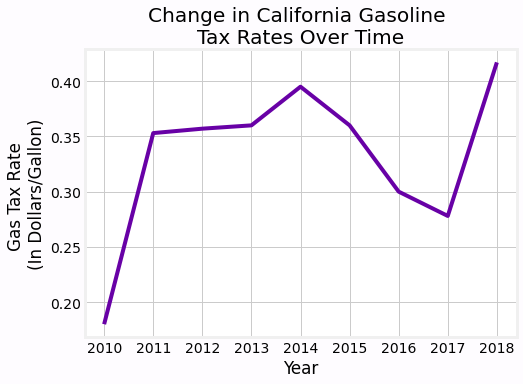

In [576]:
# Why has California decreased its CO emissions at a greater rate than any other state in the US? Perhaps the answer lies in tax-based dicincentives for the use of gas.
# https://www.cdtfa.ca.gov/taxes-and-fees/sales-tax-rates-for-fuels.htm
# tax rate is per gallon
# We couldn't find data on gasoline tax rates in California prior to 2010
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#fefcff')
ax.set_facecolor('white')

years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
cali_tax_rates = np.array([0.180, 0.353, 0.357, 0.360, 0.395, 0.360, 0.300, 0.278, 0.417])
california_gas_tax = Table().with_columns("Year", years, "Tax Rate", cali_tax_rates)
plt.plot(years, cali_tax_rates, color='#6801A6')
plt.xlabel("Year")
plt.ylabel("Gas Tax Rate \n(In Dollars/Gallon)")
plt.title("Change in California Gasoline \nTax Rates Over Time")

Text(0.5, 1.0, 'Vehicle Miles Traveled \nin California')

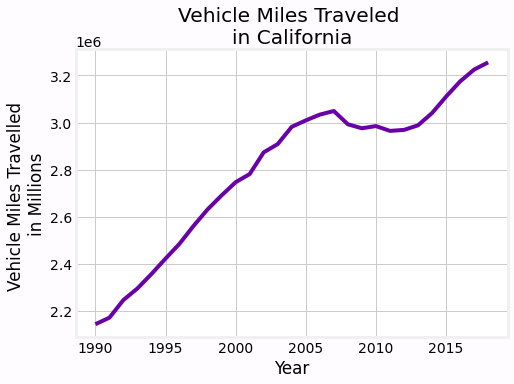

In [580]:
#California population from 1990 to 2018
# https://www.census.gov/prod/99pubs/99statab/sec31.pdf
# https://www.fhwa.dot.gov/policyinformation/statistics/2016/vmt421c.cfm
#DATA IN THOUSANDS
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#fefcff')
ax.set_facecolor('white')


years = np.array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
cal_car_reg = np.array([188798, 188136, 190362, 194063, 198045, 201530, 206365, 207754, 215496, 220461, 225821, 225331])
vehicle_miles_of_travel = np.array([2144362, 2172050, 2247151, 2296378, 2357588, 2422696, 2485848, 2561695, 2631522, 2691056, 2746925, 2781462, 2873612, 2908778, 2982017, 3009218, 3033753, 3049027, 2992705, 2975804, 2985095, 2964720, 2968815, 2988323, 3040220, 3109937, 3174408, 3224707, 3255347])
# years = np.array([2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015])
#in millions
# vehicle_miles_of_travel = np.array([328312, 324486, 322848, 320784, 326272, 329534, 332857, 335539])
# stopped at 2008
# cal_car_reg = np.array([35192491, 34914139, 29176697, 27702150, 28074977, 28686646, 29424012])
plt.plot(years, vehicle_miles_of_travel, color='#6801A6')
plt.xlabel("Year")
plt.ylabel("Vehicle Miles Travelled \nin Millions")
plt.title("Vehicle Miles Traveled \nin California")

In [597]:
total_emissions = pd.read_csv("data_imp.csv")
total_emissions = Table.from_df(total_emissions)
total_emissions

new_1990 = total_emissions.column("1990")/total_emissions.column("1990")[7]
new_1991 = total_emissions.column("1991")/total_emissions.column("1991")[7]
new_1992 = total_emissions.column("1992")/total_emissions.column("1992")[7]
new_1993 = total_emissions.column("1993")/total_emissions.column("1993")[7]
new_1994 = total_emissions.column("1994")/total_emissions.column("1994")[7]
new_1995 = total_emissions.column("1995")/total_emissions.column("1995")[7]
new_1996 = total_emissions.column("1996")/total_emissions.column("1996")[7]
new_1997 = total_emissions.column("1997")/total_emissions.column("1997")[7]
new_1998 = total_emissions.column("1998")/total_emissions.column("1998")[7]
new_1999 = total_emissions.column("1999")/total_emissions.column("1999")[7]
new_2000 = total_emissions.column("2000")/total_emissions.column("2000")[7]
new_2001 = total_emissions.column("2001")/total_emissions.column("2001")[7]
new_2002 = total_emissions.column("2002")/total_emissions.column("2002")[7]
new_2003 = total_emissions.column("2003")/total_emissions.column("2003")[7]
new_2004 = total_emissions.column("2004")/total_emissions.column("2004")[7]
new_2005 = total_emissions.column("2005")/total_emissions.column("2005")[7]
new_2006 = total_emissions.column("2006")/total_emissions.column("2006")[7]
new_2007 = total_emissions.column("2007")/total_emissions.column("2007")[7]
new_2008 = total_emissions.column("2008")/total_emissions.column("2008")[7]
new_2009 = total_emissions.column("2009")/total_emissions.column("2009")[7]
new_2010 = total_emissions.column("2010")/total_emissions.column("2010")[7]
new_2011 = total_emissions.column("2011")/total_emissions.column("2011")[7]
new_2012 = total_emissions.column("2012")/total_emissions.column("2012")[7]
new_2013 = total_emissions.column("2013")/total_emissions.column("2013")[7]
new_2014 = total_emissions.column("2014")/total_emissions.column("2014")[7]
new_2015 = total_emissions.column("2015")/total_emissions.column("2015")[7]
new_2016 = total_emissions.column("2016")/total_emissions.column("2016")[7]
new_2017 = total_emissions.column("2017")/total_emissions.column("2017")[7]
new_2018 = total_emissions.column("2018")/total_emissions.column("2018")[7]

total_emissions = total_emissions.drop("1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007","2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018")
total_emissions = total_emissions.with_columns("1990", new_1990, "1991", new_1991, "1992", new_1992, "1993", new_1993, "1994", new_1994, "1995", new_1995, "1996", new_1996, "1997", new_1997, "1998", new_1998, "1999", new_1999, "2000", new_2000, "2001", new_2001, "2002", new_2002, "2003", new_2003, "2004", new_2004, "2005", new_2005, "2006", new_2006, "2007", new_2007, "2008", new_2008, "2009", new_2009, "2010", new_2010, "2011", new_2011, "2012", new_2012, "2013", new_2013, "2014", new_2014, "2015", new_2015, "2016", new_2016, "2017", new_2017, "2018", new_2018)
total_emissions = total_emissions.remove(7)
total_emissions

Economic Sector,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Transportation,0.237233,0.232366,0.237733,0.239135,0.244125,0.246245,0.247117,0.248977,0.253239,0.261503,0.261323,0.262362,0.266578,0.263841,0.265271,0.266975,0.269307,0.265469,0.259581,0.265472,0.257972,0.25931,0.265996,0.259457,0.262354,0.269644,0.281359,0.285488,0.281961
Electricity generation,0.291377,0.293668,0.291137,0.297472,0.297223,0.295949,0.297782,0.304891,0.31501,0.314867,0.322891,0.322018,0.322345,0.32485,0.323759,0.332252,0.328026,0.332504,0.334556,0.32515,0.331172,0.323994,0.314698,0.308571,0.305918,0.29196,0.284608,0.274095,0.269435
Industry,0.253018,0.25137,0.252015,0.242908,0.24352,0.243215,0.240151,0.237923,0.232349,0.223503,0.217688,0.213662,0.210328,0.206046,0.209249,0.203153,0.209766,0.205506,0.203399,0.194149,0.20107,0.206411,0.212886,0.214779,0.210686,0.214151,0.212871,0.217552,0.220282
Agriculture,0.0930507,0.0925245,0.0911362,0.0937753,0.0906158,0.0912918,0.0896239,0.0872944,0.0876728,0.0858203,0.0819762,0.0860502,0.0859386,0.0854951,0.0857264,0.0848969,0.0856259,0.086773,0.0876347,0.0938533,0.091971,0.091384,0.0922239,0.0953044,0.0959054,0.0982553,0.0982484,0.0990067,0.0986358
Commercial,0.0665944,0.0683496,0.066539,0.064369,0.0640268,0.0631049,0.0623469,0.0608388,0.0568084,0.0558856,0.0566417,0.0559229,0.0557317,0.0576587,0.056345,0.0548076,0.0535662,0.0548004,0.0574538,0.0618651,0.0601938,0.0609372,0.0601391,0.0619044,0.0628718,0.0662802,0.0654485,0.0657751,0.0663988
Residential,0.05355,0.0555834,0.0556815,0.0564162,0.0542857,0.0542251,0.0572085,0.0541234,0.048953,0.0514032,0.0531932,0.0525747,0.0518856,0.0541253,0.0515819,0.0500629,0.0456555,0.0479384,0.0505075,0.0525152,0.0509514,0.0512155,0.0466933,0.0528833,0.0554363,0.0527237,0.0503178,0.0508975,0.0563035
U.S. territories,0.00517651,0.00613875,0.00575851,0.00592493,0.00620417,0.00597013,0.00577022,0.00595205,0.00596691,0.00701793,0.00628665,0.00741011,0.00719349,0.00798469,0.00806832,0.0078524,0.00805321,0.0070089,0.00686787,0.00699457,0.00666927,0.0067478,0.00736375,0.00710144,0.0068282,0.00698525,0.00714755,0.00718594,0.00698352


Text(0.5, 0, 'Industry')

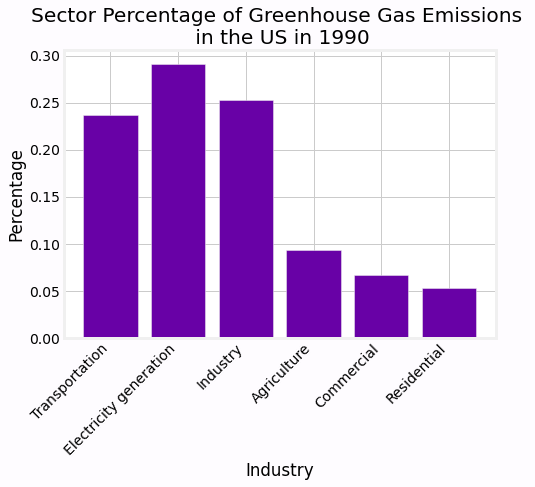

In [616]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#fefcff')
ax.set_facecolor('white')


plt.bar(total_emissions.remove(6).column("Economic Sector"), total_emissions.remove(6).column("1990"), color='#6801A6')
plt.xticks(ha="right", rotation=45)
plt.title("Sector Percentage of Greenhouse Gas Emissions \n in the US in 1990")
plt.ylabel("Percentage")
plt.xlabel("Industry")

# plt.legend()

Text(0.5, 0, 'Industry')

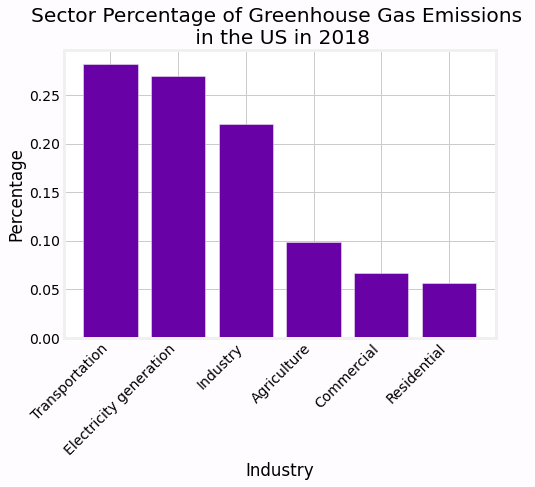

In [648]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#fefcff')
ax.set_facecolor('white')

plt.bar(total_emissions.remove(6).column("Economic Sector"), total_emissions.remove(6).column("2018"), color='#6801A6')
plt.xticks(ha="right", rotation=45)
plt.title("Sector Percentage of Greenhouse Gas Emissions \n in the US in 2018")
plt.ylabel("Percentage")
plt.xlabel("Industry")